<a href="https://colab.research.google.com/github/FreeOfConfines/ExampleNNWithKerasAndTensorflow/blob/master/Review_of_Functions,_Derivatives,_and_Gradient_Descent_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Review of Functions, Derivatives, and Gradient Descent Algorithm



>[Review of Functions, Derivatives, and Gradient Descent Algorithm](#scrollTo=c38GzWa0CK86)

>[Getting Started](#scrollTo=RCITdfmAPWdx)

>[Understanding Derivatives](#scrollTo=TjJASHunCwpM)

>[Understanding Taylor Expansion](#scrollTo=-CsUHs5TCztk)

>>[Example](#scrollTo=Fwjpo10ouB8k)

>[Function Minimization](#scrollTo=Ohko_IymBJBq)

>>[Gradient Descent Algorithm](#scrollTo=Ohko_IymBJBq)

>>[Newton's Method](#scrollTo=Wik9otlNf4mh)

>>>[Algorithm Summary](#scrollTo=Wik9otlNf4mh)



#Getting Started

In this material we will review concepts of derivatives and gradient-descent algorithm. For sake of clarity, we will work with a specific function which is simple and yet, useful in conveying the key ideas. Every key idea is supported with an example written in Tensorflow. Feel free to change parameters set in these code snippets in order to learn the concepts.

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nbconvert

# Understanding Derivatives

Consider a function $f(x)$ where $x$ is a real number (not a vector) and $f(.)$ is a function that operates on input $x$ to produce an output, another real number, $y$. The function is univariate and this function can be visualized with a two-dimensional chart like the one below. The x-axis of the plot denotes values of $x$ and y-axis denotes values of $f(x)$ evaluated at different values of $x$.As an example, we will consider an exponential function.

In the chart below, observe that the function values grow larger on either side of $x=5.0$.

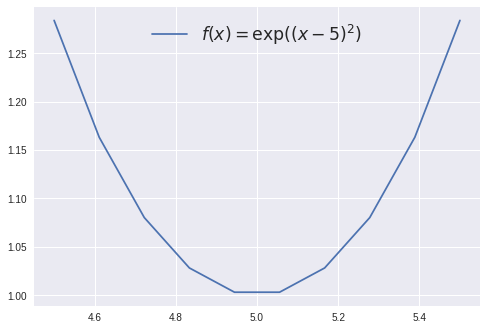

In [2]:
# Goal : Define f(x), compute f'(x) and f"(x).
minX = 4.5 
maxX = 5.5 
nXPoints = 10
x = tf.lin_space(minX,maxX,nXPoints) # x takes 10 values between 4.5 and 5.5
fx = tf.exp((x-5)**2) # fx is a function in x f: Real --> Real
dfx = tf.gradients(ys=fx,xs=[x]) # find dfx/dx parital derivative (here with respect to x)
d2fx = tf.gradients(ys=dfx,xs=[x]) # find d^2fx/dx partial derivative 
with tf.Session() as sess:
  plt.figure(1)
  plt.plot(sess.run(x), sess.run(fx), label=r'$f(x)=\exp{((x-5)^2)}$') # running is evaluating expression fx and computing it at all values of x
  plt.legend(fontsize='x-large')


Derivative of a function, say $f(x)$, characterizes the rate of fall or rise of the function in the neighborhood of any point $x$. Derivative of a function $f(x)$ is often denoted as $f'(x)$ and is defined as follows:
\begin{equation}
f'(x) = \lim_{h\to 0}\frac{f(x+h)-f(x)}{x+h-x} = \lim_{h\to 0} \frac{f(x+h)-f(x)}{h}
\end{equation}

The numerator of the expression above characterizes the change in value of the function around $x$, think of $h$ as a small pertubation around the $x$. The denominator expresses the pertubation around $x$. The ratio characterizes rate of increase or decrease in $f(x)$ at or around $x$.

Tensorflow automatically computes derivative of a function, i.e., an exponential in our example. Below is a plot of the derivative $f'(x)$ plotted alongside $f(x)$. Note $f'(x)$ for $x < 5.0$ is negative and keeps growing as values of $x$ get more negative. Negative slope means that $f(x)$ is decreasing with increasing $x$ which clearly is the case for $x < 5.0$. Positive slope means that $f(x)$ is increasing with increasing $x$ which clearly is the case for $x > 5.0$. A slope of zero holds special significance: zero slope means there is no change in $f(x)$ in the neighborhood of a chosen $x_t$, i.e., $f(x)$ is flat. Zero slope at some $x_t$ means one of the following:
* $f(x_t)$ is a minimum of the function $f(x)$
* $f(x_t)$ is a maximum of the function $f(x)$
* $f(x_t)$ is a saddle point, i.e., neither minimum or maximum

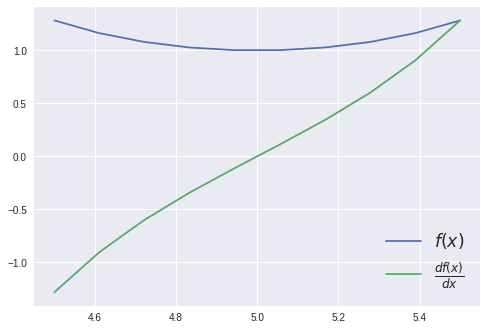

In [3]:
with tf.Session() as sess:
  plt.figure(2)
  plt.plot(sess.run(x), sess.run(fx), label=r'$f(x)$') # running is evaluating expression fx and computing it at all values of x
  plt.plot(sess.run(x), sess.run(dfx)[0], label=r'$\frac{df(x)}{dx}$')
  plt.plot()
  plt.legend(fontsize='x-large')
  

One should examine second derivative of the function to resolve among the above three options. Note $f'(x=5.0)=0$ and $f''(x=5.0)>0$ and therefore, $f(x=5.0)$ is the minimum of function $f(x)$. Also, $arg_x max f(x) = x^*= 5.0$.

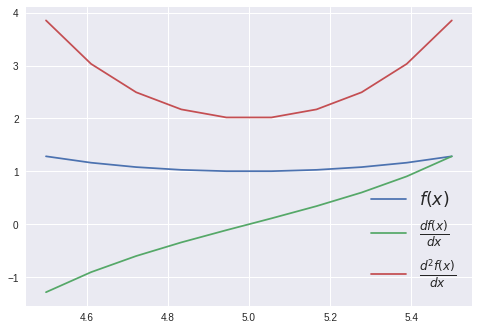

In [4]:
with tf.Session() as sess:
  plt.figure(2)
  plt.plot(sess.run(x), sess.run(fx), label=r'$f(x)$') # running is evaluating expression fx and computing it at all values of x
  plt.plot(sess.run(x), sess.run(dfx)[0], label=r'$\frac{df(x)}{dx}$')
  plt.plot(sess.run(x), sess.run(d2fx)[0], label=r'$\frac{d^{2}f(x)}{dx}$')
  plt.plot()
  plt.legend(fontsize='x-large')
  

#Understanding Taylor Expansion



Taylor series shows a way to approximate a function $f(x)$ around a given point, say, $\bar{x}$; around a point means values of $x$ in the neighborhood of $\bar{x}$. It is important to understand that approximation is less valid as $x$ gets farther away from $\bar{x}$. 

The approximation looks like this:

$f(x) = f(\bar{x}+\Delta) \approx f(\bar{x})+ \frac{\Delta}{1} f'(\bar{x})+ \frac{\Delta^2}{1*2} f''(\bar{x}) +  \frac{\Delta^3}{1*2*3} f'''(\bar{x}) + ...$

Note 

* $\Delta$ defines how far $x$ is from $\bar{x}$
* $f'(\bar{x})$ is first derivative computed at $\bar{x}$ $\implies$ $f'(\bar{x})$ is a number
* $f''(\bar{x})$ is second derivative computed at $\bar{x}$ $\implies$ $f''(\bar{x})$ is a number
* $f'''(\bar{x})$ is third derivative computed at $\bar{x}$ $\implies$ $f'''(\bar{x})$ is a number
* Summation terms continue in this fashion

##Example

Consider a function $f(x) = x^4 - 3x^3 + 2$ and let $\bar{x}=1.0$. We will approximate $f(x)$ for values of $x$ around $\bar{x}$ using Taylor series and check how the approximation compares against $f(x)$.


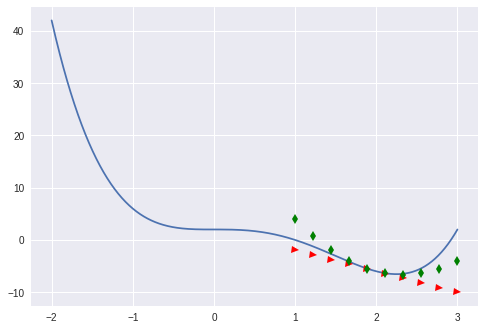

In [5]:
x = tf.placeholder(tf.float32, shape=None)
fx = tf.pow(x, 4.0) + tf.multiply(tf.pow(x, 3.0), -3.0)+ 2.0
dfx = tf.gradients(ys=fx, xs=[x])
d2fx = tf.gradients(ys=dfx, xs=[x])

with tf.Session() as sess:
  plt.figure()
  
  input = np.linspace(-2.,3., 1000)
  finput = sess.run(fx, feed_dict={x: input})
  plt.plot(input, finput, label=r"$f(x)=x^4 - 3x^3 + 2$")
    
  input = np.asarray([2.])
  finput = sess.run(fx, feed_dict={x: input}) # f(2.)
  dfinput = sess.run(dfx, feed_dict={x: input}) # f'(2.)
  d2finput = sess.run(d2fx, feed_dict= {x: input}) # f''(2.)
  
 
  delta = np.linspace(-1.,1.,10)
  input = 2. + delta
  linApprox = finput + delta*dfinput
  input = np.reshape(input,np.shape(linApprox))
  plt.plot(input, linApprox, 'r->')
  
  quadraticApprox = finput + delta*dfinput + (((delta**2)/2.)*d2finput)
  plt.plot(input, quadraticApprox, 'g-d')

The blue curve is a plot of the function $f(x)$ for $-2 < x < 3$. Red curve is an approximation of $f(x)$ using first two terms of the Taylor expansion which only allows for linear approximation, i.e., line-like approximation of the blue curve. 

$f(x) = f(\bar{x}+\Delta) \approx f(\bar{x})+ \frac{\Delta}{1} f'(\bar{x})$

When we add the second term to approximation, we get the green curve which allows for curvature and clearly, a better approximation of the blue curve. 

$f(x) = f(\bar{x}+\Delta) \approx f(\bar{x})+ \frac{\Delta}{1} f'(\bar{x})+ \frac{\Delta^2}{1*2} f''(\bar{x})$

Of course, you can more terms of the Taylor series to improve approximation; but for this example, fifth derivative will turn to zero. 


# Function Minimization

Say, we want to find $x$ that minimizes the function $f(x) = x^4 - 3x^3 + 2$. But why is finding minimum or maximum of a function interesting or useful, you may ask. Typically, a machine (think neural networks or other traditional estimators) learns by minimizing or maximizing a cost function. For instance, in a regression problem learning is accomplished by reducing error between *true output* and *estimated output* as close to zero as possible. In a classification problem learning is accomplished by minimizing the number of misclassification instances as close to zero as possible. Therefore, maximization and minimization are key to a lot of learning and optimization problems.

Commonly there are many approaches to solving minimization and maximization problems and these approaches may be specific to the kind of function $f(x)$ that we are trying to minimize or maximize. Here we will learn an iterative method to find $x$ that minimizes $f(x)$. An iterative method starts with an initial guess for $x$, say $\bar{x}=2$, and improves the guess with each iteration until, of course, we achieve $x$ that minimizes $f(x)$. One such method that we will learn here is the Gradient Descent Algorithm.


##Gradient Descent Algorithm

Let us revisit first-order Taylor series expansion of $f(x)$:

$f(x) = f(\bar{x}+\Delta) \approx f(\bar{x})+ \frac{\Delta}{1} f'(\bar{x})$

With an initial guess for $\bar(x)$, the expression on the right-hand side (RHS) approximates the value of $f(.)$ at $\bar{x}+\Delta$. 

* If $f'(\bar{x})$ is positive, $\Delta$ must be negative (however small) for the summation in the RHS to be smaller than $f(\bar{x})$ $\implies$ Need to make the next guess for $\bar{x}$ smaller than its current value in order to minimize $f(x)$.
* If $f'(\bar{x})$ is negative, $\Delta$ must be positive (however small) for the summation in the RHS to be smaller than $f(\bar{x})$ $\implies$ Need to make the next guess for $\bar{x}$ larger than its current value in order to minimize $f(x)$.

In both cases, note how $\Delta$ should take on a sign opposite to the sign of $f(x)$ such that $f(.)$ decreases at the subsequent $\bar{x}$. Gradient descent algorithm simply uses this idea to propose the following update to the current guess:

\begin{equation}
\bar{x}^{(n)} = \bar{x}^{(n-1)} - \delta*f'(\bar{x}^{(n-1)}),
\end{equation}

where $\delta \ge 0$ is called the learning factor and $\bar{x^{n-1}}$ is the (n-1)-st guess of $\bar{x}$ in the iterative process. It is a good practice to keep $\delta$ small; remember Taylor series approximation is typically only good in a *small* neighborhood around a selected point and keeping $\delta$ will guarantee that you are moving $\bar{x^{n}}$ too far from $\bar{x^{n-1}}$.

One reasonable question: What happens to the iterative process once $f(\bar{x})$ reaches minimum? We know that $f'(\bar{x}$ will be zero because $f(\bar{x})$ is the minimum of the function. Therefore, the update equation will leave $\bar{x}$ unchanged.

Iteration =  199 Derivative @ x_bar = -0.0017433167 x_bar= 2.2499175


Text(0,0.5,'f(x_bar)')

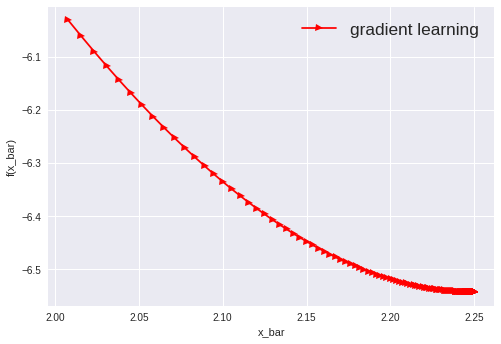

In [6]:
# Find x_bar that minimizes f(x) using iterative gradient-descent method
learningFactor = 2.*(10**(-3.))
nLearningSteps = 200

x_bar = tf.Variable(initial_value=2., name="xBar") #

fxbar = tf.pow(x_bar, 4.0) + tf.multiply(tf.pow(x_bar, 3.0), -3.0)+ 2.0
dfxbar = tf.gradients(ys=fxbar, xs=[x_bar], name="dfxbar") # find dfx/dx parital derivative (here with respect to x)

update = x_bar.assign_sub(tf.multiply(learningFactor,dfxbar[0]))

histXbar = np.array([])
histfxbar = np.array([])
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())   
  
  for it in range(nLearningSteps):
    derivative = sess.run(dfxbar)[0]
    sess.run(update)
    histXbar = np.append(histXbar, sess.run(x_bar))
    histfxbar = np.append(histfxbar, sess.run(fxbar))
  print('Iteration = ',it, 'Derivative @ x_bar =', derivative, 'x_bar=', sess.run(x_bar))
  
# Plotting learning algorithm
plt.plot(histXbar, histfxbar, 'r->', label='gradient learning')
plt.grid(1)
plt.legend(fontsize='x-large')
plt.xlabel('x_bar')
plt.ylabel('f(x_bar)')


Tensorflow code above implements the gradient descent algorithm with the learning factor of $0.002$; you may try playing with this value. After a total of 200 iterations, $\bar{x}$ converges to nearly $2.25$. The plot captures how $\bar{x}$ reaches $2.25$ starting from $2.0$ and the y-axis is the corresponding $f(.)$. Note that $f(.)$ decreases further with each new choice for $\bar{x}$.

##Newton's Method

In Gradient Descent algorithm, we used linear approximation of $f(.)$ at $\bar{x}$ to come up with the subsequent guess. We have shown that linear approximation, obviously, cannot capture curvature in the function and therefore, approximation is limited. Accounting for curvature in $f(x)$ (if any) will require using additional terms (not just first two terms) in Taylor series expansion. One such method is the Newton's method which will use first and second derivative in order to generate the subsequent guess for $\bar{x}$.

Let's start by assuming that $\bar{x}$ is the initial guess for $x$ that minimiizes $f(.)$. The approximation of $f(x)$ in the neighborhood of $\bar{x}$ that includes the second derivative is
\begin{equation}
f(x) = f(\bar{x}+\Delta) \approx f(\bar{x})+ \frac{\Delta}{1} f'(\bar{x})+ \frac{\Delta^2}{1*2} f''(\bar{x})
\end{equation}
For ease of discussion, we will refer to the RHS as $g(x)=g(x+\Delta)$ (nothing new just introducing a notation here); i.e., $g(x)$ is an approximation of $f(x)$. RHS is quadratic in $\Delta$ which is easy to work with and therefore, let us try to find $\Delta$ that minimizes RHS:
\begin{equation}
g'_{\Delta}(x) = 0 + f'(\bar{x}) + \Delta f''(\bar{x}) = 0
\end{equation}
We have seen earlier that derivative of a function is zero at minimum or maximum and so, we set first derivative of g(x) with respect to $\Delta$ to zero. Solving for $\Delta$:

\begin{equation}
\Delta = \frac{-f'(\bar{x})}{f''(\bar{x})}
\end{equation}

What have we found so far: Possible minimum or maximum of $g(x)$ lies at $\bar{x}-\frac{-f'(\bar{x})}{f''(\bar{x})}$. If it is indeed the minimum, then second derivative of $g(x)$ should be positive at this point:
\begin{equation}
g''_\Delta(x) = f''(\bar{x}) 
\end{equation}

Next guess for $\bar{x}$ is $\bar{x}-\frac{-f'(\bar{x})}{f''(\bar{x})}$ and the process continues until convergence is achieved.

###Algorithm Summary
* Start with an initial guess for $\bar{x}$, say $\bar{x}^{(n=0)}$
* Compute $\Delta = \frac{-f'(\bar{x})}{f''(\bar{x})}$
* Compute next guess, $\bar{x}^{(n+1)}=\bar{x}^{(n)}+\Delta$
* Continue these steps until convergence or to a pre-determined number of steps

Iteration =  199 Derivative @ x_bar = 0.0 Second derivative @ x_bar =  20.25 x_bar= 2.25


Text(0,0.5,'f(x_bar) or d2f(x_bar)')

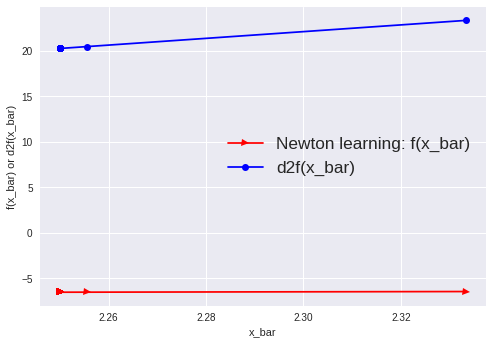

In [13]:
# Find x_bar that minimizes f(x) using Newton's method for optimization
learningFactor = 2.*(10**(-3.))
nLearningSteps = 200

x_bar = tf.Variable(initial_value=2., name="xBar") #

fxbar = tf.pow(x_bar, 4.0) + tf.multiply(tf.pow(x_bar, 3.0), -3.0)+ 2.0
dfxbar = tf.gradients(ys=fxbar, xs=[x_bar], name="dfxbar") # find dfx/dx parital derivative (here with respect to x)
d2fxbar = tf.gradients(ys=dfxbar, xs=[x_bar], name="d2fxbar") # find f''(x) partial derivative (here with respect to x)

update = x_bar.assign_sub(tf.div(dfxbar[0],d2fxbar[0])) # the negative sign in update is absorbed into subtraction

histXbar = np.array([])
histfxbar = np.array([])
histd2fxbar = np.array([])
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())   
  
  for it in range(nLearningSteps):
    derivative = sess.run(dfxbar)[0]
    derivative2 = sess.run(d2fxbar)[0]
    sess.run(update)
    histXbar = np.append(histXbar, sess.run(x_bar))
    histfxbar = np.append(histfxbar, sess.run(fxbar))
    histd2fxbar = np.append(histd2fxbar, sess.run(d2fxbar))
  print('Iteration = ',it, 'Derivative @ x_bar =', derivative, 'Second derivative @ x_bar = ', derivative2, 'x_bar=', sess.run(x_bar))
  
# Plotting learning algorithm
plt.plot(histXbar, histfxbar, 'r->', label='Newton learning: f(x_bar)')
plt.grid(1)
plt.plot(histXbar, histd2fxbar, 'b-o', label='d2f(x_bar)')
plt.legend(fontsize='x-large')
plt.xlabel('x_bar')
plt.ylabel('f(x_bar) or d2f(x_bar)')

The code snippet above is an implementation of Newton's method on our example, i.e., $f(x) = x^4 - 3x^3 + 2$. The code is not too different to the one from the snippet implementing Gradient-Descent algorithm. Tensorflow is able to automatically compute first and second derivative of $f(x)$. Few key observations:

* The blue curve is the plot of $f''(x)$ at subsequent guesses for $\bar{x}$ and it takes value greater than zero $\implies$ we are moving to the minimum (not maximum) at each step; note this is not to say that we are moving to the minimum of $f(x)$ in each step but rather to the minimum of $g(x)$.
* The method achieves the optimal $\bar{x}=2.25$ within two or three guesses, faster than the Gradient Descent algorithm.